In [26]:
import pandas as pd
import shapely
import geopandas as gpd

from os import listdir
from os.path import join

import matplotlib.pyplot as plt

- Minnesota, Iowa, Wisconsin, North Dakota, South Dakota, Nebraska, Illinois, Indiana, Missouri, Michigan, Kansas

<Axes: >

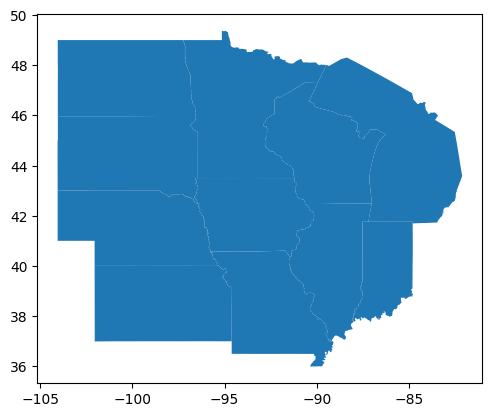

In [12]:
gdf = gpd.read_file('./data/gadm41_USA_1.json')
states = ['Minnesota', 'Iowa', 'Wisconsin', 'NorthDakota', 'SouthDakota', 'Nebraska', 'Illinois', 'Indiana', 'Missouri', 'Michigan', 'Kansas']
gdf = gdf[gdf.NAME_1.isin(states)].reset_index(drop=True)
gdf.plot()

In [71]:
fluxes = gpd.read_file('./data/target_fluxes_LE.csv')
fluxes['geometry'] = [shapely.geometry.Point([row['lon'], row['lat']]) for _, row in fluxes.iterrows()]
fluxes = gpd.GeoDataFrame(fluxes).set_crs(gdf.crs)
fluxes

,TIMESTAMP,LE_F_MDS,LE_F_MDS_QC,site,lat,lon,IGBP,geometry
0,19960417,10.4692,1.0,FLX_FI-Hyy,61.8474,24.2948,ENF,POINT (24.2948 61.8474)
1,19960418,9.91646,1.0,FLX_FI-Hyy,61.8474,24.2948,ENF,POINT (24.2948 61.8474)
2,19960419,18.9533,0.979167,FLX_FI-Hyy,61.8474,24.2948,ENF,POINT (24.2948 61.8474)
3,19960420,17.4828,1.0,FLX_FI-Hyy,61.8474,24.2948,ENF,POINT (24.2948 61.8474)
4,19960421,26.3932,1.0,FLX_FI-Hyy,61.8474,24.2948,ENF,POINT (24.2948 61.8474)
...,...,...,...,...,...,...,...,...
842180,20111119,0.72118,1.0,AMF_CA-MA2,50.171,-97.8762,CRO,POINT (-97.8762 50.171)
842181,20111120,0.638906,1.0,AMF_CA-MA2,50.171,-97.8762,CRO,POINT (-97.8762 50.171)
842182,20111121,0.547386,1.0,AMF_CA-MA2,50.171,-97.8762,CRO,POINT (-97.8762 50.171)
842183,20111122,0.863575,1.0,AMF_CA-MA2,50.171,-97.8762,CRO,POINT (-97.8762 50.171)


<Axes: >

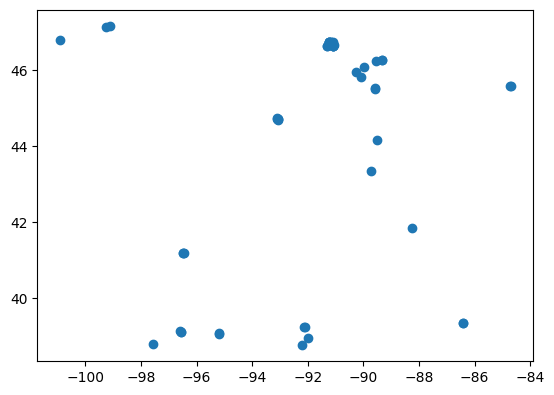

In [73]:
sites = fluxes[['geometry', 'site', 'IGBP']].drop_duplicates()
sites = gpd.sjoin(sites, gdf, how='inner')[['geometry', 'site', 'IGBP']]
sites.plot()

In [74]:
fluxes = fluxes[fluxes['site'].isin(sites.site)]
print(f'Total Observations: {len(fluxes)}\tIGBP types: {len(fluxes.IGBP.unique())}')

Total Observations: 112328	IGBP types: 7


<Axes: >

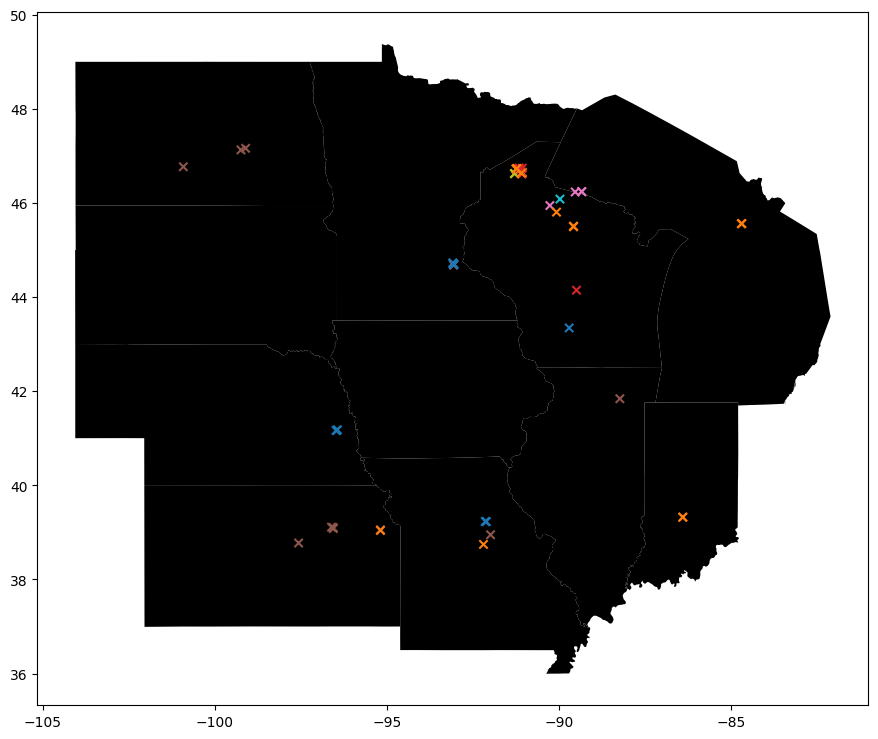

In [75]:
fig, ax = plt.subplots(figsize=(16,9))
gdf.plot(ax=ax, color='black')
sites.plot(ax=ax, column='IGBP', marker='x')

In [79]:
fluxes.drop('geometry', axis=1).to_csv('./data/LE_flux_dataset.csv')